In [1]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline
import statsmodels.api as sm
import operator


Populating the interactive namespace from numpy and matplotlib


## Task 1

In [2]:
#np.save('MTA_Fare-2.npy',)
a = np.load('MTA_Fare-2.npy')


In [3]:
# data: 600 stations, 23 card types, 194 weeks
a.shape


(600, 23, 194)

In [4]:
#[allstations, 5th cardtype, 4th week]
a[:,4,3]

array([ 261,   24,    0,    2,    0,    0,    6,    5,    9,  130,   65,
       3298,  710,  607,  943,   28,  569,   13,    6,  610,   92,  661,
        477,  216,   13,   -1, 1312,  252,  726,  489, 1474,  153,  507,
         18,   99,    0,    2,    3,   31,    2,  348,   89,  616,  367,
       1586, 2553, 1129,  344,   88,  211,  150,    7,    2,  165,   23,
         12, 1435,    3,    1,    4,    0,    3,    1,    7,    0,    0,
          0,    0,    0,    4,   -1,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,  183,  128,   79,   12,  113,  460,   81,   44,   15,    5,
         16,    5,    7,   10,   20,    9,    7,   11,    8,    8,   19,
          0,   13,   26,    6,    1,  107,    0,    1,  252,    2,   18,
         34,   13,  336,    2,    3,  643,    3,    6,    8,    0,   48,
          1,    4,    0,    5,   15,   47,    9,    7,    3,  289,  204,
          6,  643,    2,    8,    3,  118,  177,   12,   29,   17,  151,
         66,    7,    3,  246,    0,    4,    8,   

In [5]:
# -1 means  card type not exsiting. 
#We need to find a way to don't take tohse samples into acount to don't distort the analysis

In [6]:
#for this assignment we would like to avarge or sum the by weeks 
#collapsing both the first and second array and suming only by weeks

In [7]:
a = a.astype('float')
a[a == -1] = np.nan
a[0]

array([[ 56961.,  64703.,  68002., ...,  36527.,  33929.,  36824.],
       [  1732.,   2083.,   2107., ...,   1264.,   1172.,   1238.],
       [   203.,    276.,    245., ...,    186.,    167.,    167.],
       ..., 
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [    nan,     nan,     nan, ...,   1121.,   1377.,    712.]])

In [8]:
#first station, first card, first week
a[0][0][0]


56961.0

In [9]:
a[0][0][2]

68002.0

In [10]:
#collapsing the first dimension -card types per week 
y= np.nansum(a, axis=0)

In [11]:
y.dtype

dtype('float64')

In [12]:
y[4]

array([ 46808.,  64353.,  56994.,  37429.,  35210.,  46849.,  60225.,
        47439.,  32084.,  52171.,  54660.,  44183.,  29340.,  37160.,
        45464.,  61920.,  45491.,  36554.,  63071.,  59699.,  50235.,
        33666.,  60117.,  61981.,  55200.,  24627.,  47185.,  64080.,
        59255.,  30367.,  12491.,  12490.,  60697.,  57599.,  44960.,
        32562.,  54802.,  68555.,  55539.,  28982.,  56734.,  67133.,
        54364.,  39616.,  36333.,  63590.,  63905.,  38368.,  34643.,
        61061.,  51641.,  35431.,  41360.,  64671.,  60152.,  42711.,
        35097.,  47115.,  61586.,  50756.,  37000.,  55148.,  56653.,
        44867.,  33024.,  30539.,  53716.,  65450.,  51223.,  28505.,
        63428.,  60261.,  53439.,  40465.,  55714.,  62219.,  56681.,
        28302.,  45875.,  64609.,  60130.,  40192.,  18255.,  50859.,
        64966.,  47341.,  40972.,  49666.,  64156.,  57871.,  32709.,
        45688.,  63539.,  60167.,  45975.,  29874.,  54341.,  54239.,
        53079.,  417

In [13]:
#now colapse over card  type
b = np.nansum(a, axis=1)
print b

[[ 126878.  149477.  152383. ...,   78901.   74591.   76833.]
 [  37306.   46464.   49359. ...,       0.       0.       0.]
 [   6606.    6881.    7229. ...,    8171.    7907.    6790.]
 ..., 
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]]


In [14]:
print y.shape
print b.shape

(23, 194)
(600, 194)


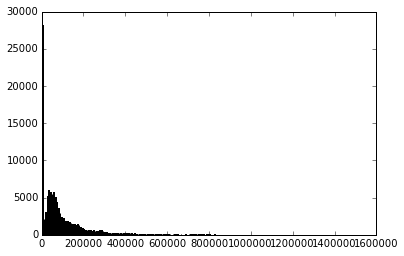

In [15]:
hist, bins = np.histogram(b, bins=194)
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) 
plt.bar(center, hist, align='center', width=width)
plt.show()

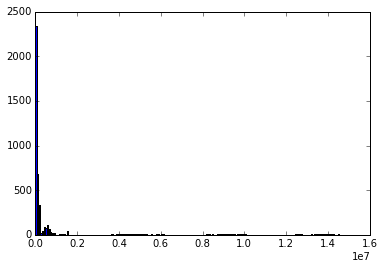

In [16]:
hist, bins = np.histogram(y, bins=194)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [17]:
# I would work on the stations and weeks as a series I would like to create a new array for all weeks 
#mean.per WEEK to have the avrage trips per week and be able to plot it as a time series 

In [18]:
#tried to create a np.zeros array and fil it up- didn't work so I just created a new array with means of all weeks 
#mta_mean=np.zeros(600)
#print mta_mean.shape
#for (i) in mta_mean:
m=np.mean(b, axis=0)
#print mta_mean
print m
m.shape

[ 44533.77833333  48776.61833333  49335.315       48979.32        48642.94666667
  43686.11        47806.02333333  48542.74333333  48006.35666667  47665.91
  47186.69833333  46551.69166667  45452.835       47083.92833333
  44478.62333333  50031.26        50306.31666667  48420.16666667
  50114.35666667  48620.71833333  50545.11333333  50317.15333333
  49978.78833333  50089.07666667  50214.99        41940.65166667
  48648.69833333  50967.98333333  50177.65166667  45935.36166667
  36338.28833333  36327.28        45805.205       45187.56666667  43356.525
  44056.31666667  47766.78833333  48506.53833333  49294.38        44535.98
  48633.67333333  49001.1         49800.97666667  49462.36666667
  49208.93333333  50292.9         50327.79166667  47500.15166667
  48392.44166667  50663.84833333  49987.11833333  49922.45        45247.695
  49750.185       50276.64166667  49965.44333333  50496.81166667  44573.825
  49946.145       49126.03166667  48755.21333333  49049.73666667
  48438.82333333  466

(194,)

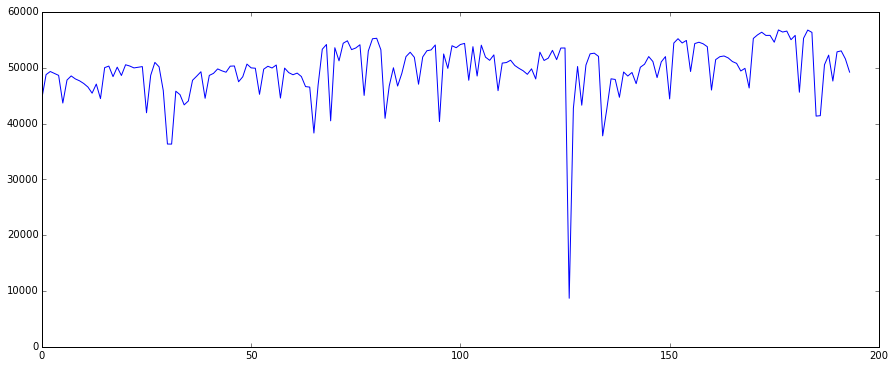

In [19]:
#now I need to plot m to find the downroad 
pl.figure(figsize=(15,6))
plot(m)

In [20]:
#the rsult showes one really wired week. with very low no of trips. lets find std 
np.std(m)

4973.2673695014764

In [21]:
import matplotlib.pyplot as plt

In [22]:
thresholds = [np.mean(m) - 3*np.std(m),
            np.mean(m) + 3*np.std(m)]
print thresholds


[34715.781010052269, 64555.385227061131]


In [23]:
#any obsevrvation under 34,715 should be removed as this is the threshold
#no need to caclulte bigger than three as it's out the ploting for this case
min(m)

8697.8099999999995

(40000, 60000)

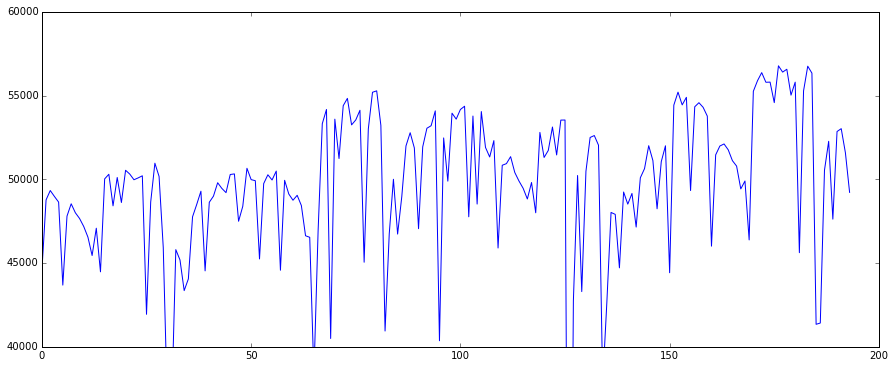

In [24]:


##### we ned to plot without this observation as it's distorting our data
# i did a trick here to see the data in zoom in 

pl.figure(figsize=(15,6))
plot(m)
plt.ylim(40000,60000)


In [25]:
# in this way we are ablr to indentify ouliers to the entire population seeing that there are weeks with 

In [26]:
#removing the small observation
m[m < 8697.8099999999995] = np.nan

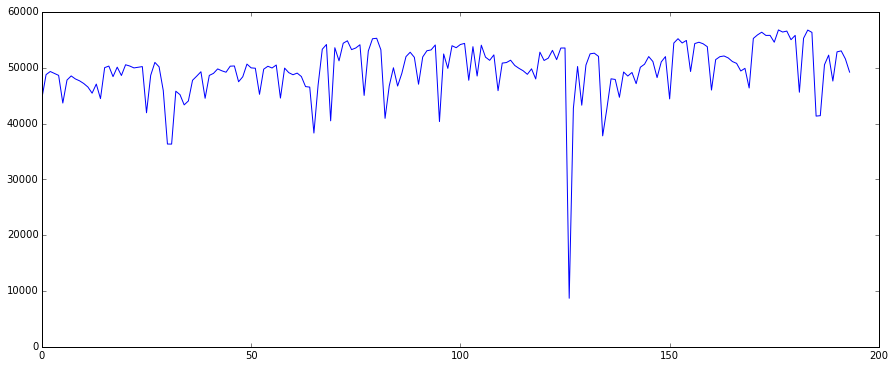

In [27]:

pl.figure(figsize=(15,6))
plot(m)

### Yayyy it worked  :)

In [28]:
thresholds = [np.nanmean(m) - 3*np.nanstd(m),
            np.nanmean(m) + 3*np.nanstd(m)]
print thresholds

[34715.781010052269, 64555.385227061131]


In [29]:
#the new thresholds for our time series without the outlier is [37797.87840469677, 61897.513460588183]

## Task 2

In [30]:
# now I need to indentify card types per weeks 



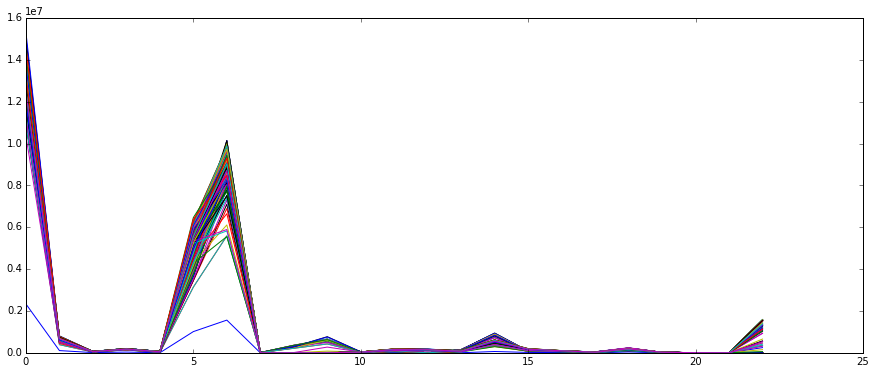

In [131]:

pl.figure(figsize=(15,6))
plot(y)
ax=fig.add_subplot(111)

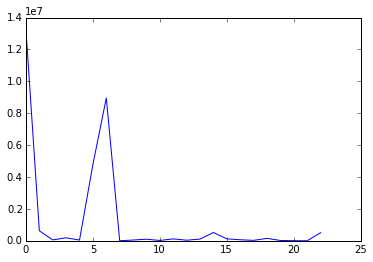

In [32]:
y.shape

#print n
n=np.mean(y, axis=1)
plot(n)

In [33]:
# this is 600 weeks of 23 difrent card types


## Task 3

In [34]:
# fourie transform is a  halp of the frequency (104 /2). 
#the result is siginificing of if theres a periodicity (big -omportsnt, small-not important.)
#fourier rsult- to frequency- the fft code 
# 
# annual preodcily for sevrel stations 

In [60]:
# we need stations data, collapsing type data

mta = np.nansum(a, axis=1)

In [61]:
print mta
mta.shape

[[ 126878.  149477.  152383. ...,   78901.   74591.   76833.]
 [  37306.   46464.   49359. ...,       0.       0.       0.]
 [   6606.    6881.    7229. ...,    8171.    7907.    6790.]
 ..., 
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]
 [      0.       0.       0. ...,       0.       0.       0.]]


(600, 194)

In [62]:
# waht we want is use the fourier transform in order to indentify wehigts 

In [63]:
len(mta_fft)

600

In [39]:
print mta_fft

[[  2.31599080e+07   2.68378957e+06   1.36359428e+06 ...,   1.79332585e+05
    6.70736491e+04   1.84718000e+05]
 [  4.00852800e+06   2.27399874e+06   3.01857838e+05 ...,   1.74572265e+04
    5.12234283e+04   5.52980000e+04]
 [  1.40536300e+06   1.17424874e+03   6.24088585e+04 ...,   1.31979338e+04
    1.44260004e+04   2.86500000e+03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [64]:
# for some reason the plot has spread around. but this is sopused to find a preoidicy 

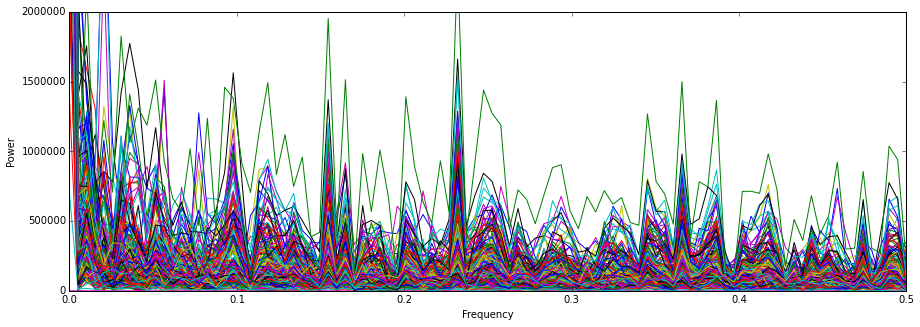

In [112]:


mta_fft = np.abs(np.fft.rfft(mta))
sample_rate = 1
N = 194
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

for i in range(194):
    
    mta_fft[i] = np.abs(np.fft.rfft(mta[i]))
    ax = fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), mta_fft[i])
    ax.set_ylim(0, 2000000)
    ax.set_xlim(0, 0.5)
    ax.set_ylabel('Power', fontsize = 10)
    ax.set_xlabel('Frequency', fontsize = 10)

In [113]:
#Trying to locate periodicity 
np.where(mta_fft<10000) 

(array([  1,   2,   2, ..., 599, 599, 599]),
 array([65,  1,  8, ..., 95, 96, 97]))

In [114]:
np.where([mta_fft>30000000]) 
#this result is finding the stations w biggest power
#but I want the WEEKS 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([  9,  10,  11,  13,  16,  17,  19,  20,  21,  22,  24,  28,  30,
         31,  32,  43,  45,  46,  50,  54,  56,  79,  83, 107, 126, 130,
        137, 167, 169, 174, 175, 176, 177, 178, 292, 451]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

### Trying some extra credit 


In [74]:
#Flatening the arrays into 600*23 staying only with time series
tots = a.transpose(2,0,1).reshape(a.shape[2], a.shape[1]*a.shape[0]).T

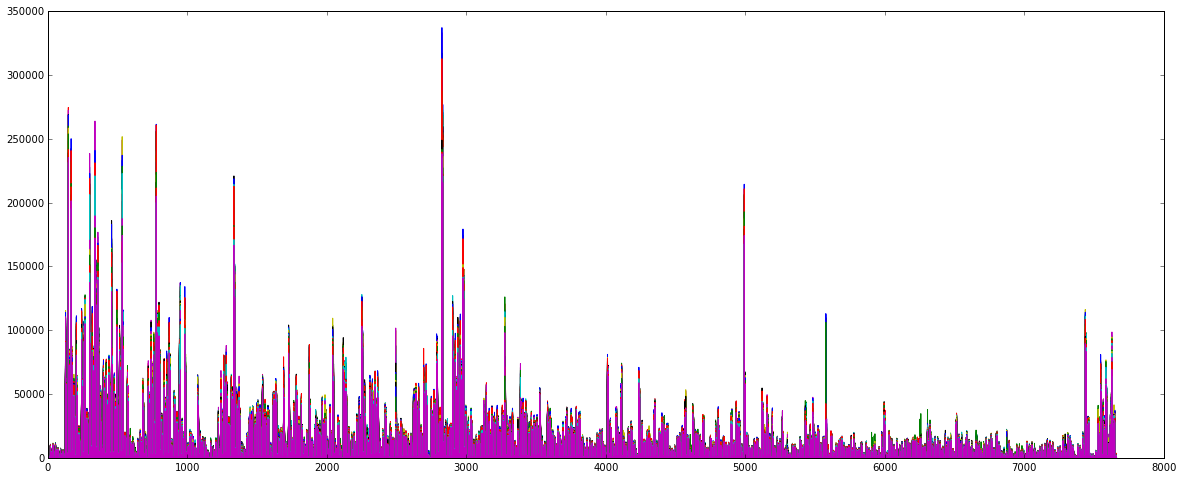

In [129]:
fig=pl.figure(figsize=(20,8))
plot(tots)
ax=fig.add_subplot(111)

In [76]:
#removing empty curves 
tots = tots[tots.std(1)>0]

In [120]:
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs




In [141]:

n_clusters= 10 
KMeans(n_clusters)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [128]:
X, labels_true = make_blobs(n_samples=13800, centers=10, cluster_std=0.7)


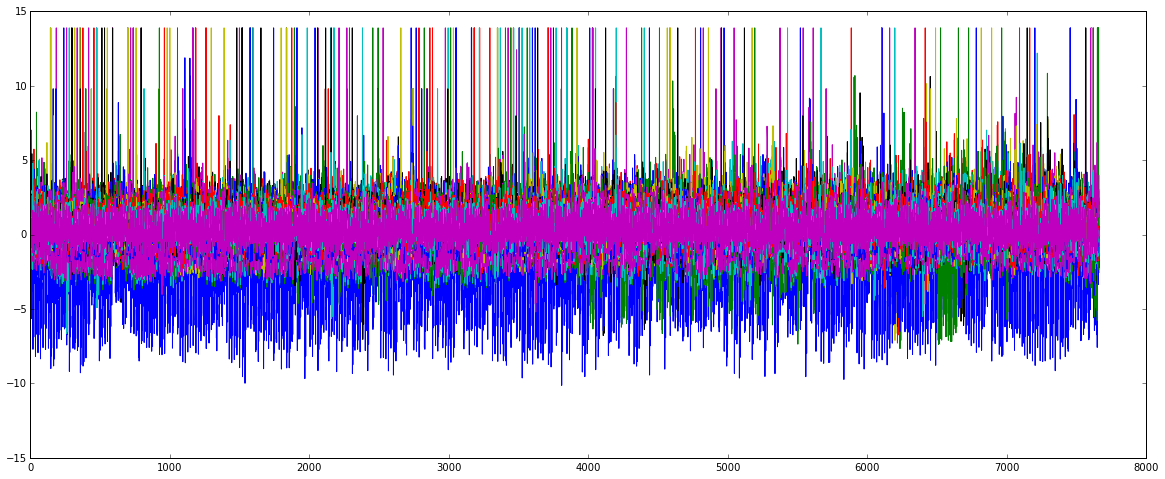

In [140]:
fig=pl.figure(figsize=(20,8))
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
plot(vals)
ax=fig.add_subplot(111)
